In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering as AC
sns.set(style="darkgrid")

In [20]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.tsv", sep="\t", usecols=['OFNS_DESC', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_SEX'])

In [21]:
loc_to_change  = list(df['OFNS_DESC'].value_counts()[30:].index)
df.loc[df['OFNS_DESC'].isin(loc_to_change) , df.columns=='OFNS_DESC'] = 'OTHER'
df['OFNS_DESC'] = pd.Categorical(df['OFNS_DESC'])

In [22]:
loc_to_change  = list(df['PREM_TYP_DESC'].value_counts()[30:].index)
df.loc[df['PREM_TYP_DESC'].isin(loc_to_change) , df.columns=='PREM_TYP_DESC'] = 'OTHER'
df['PREM_TYP_DESC'] = pd.Categorical(df['PREM_TYP_DESC'])

In [23]:
df['SUSP_AGE_GROUP'] = pd.Categorical(df['SUSP_AGE_GROUP'], categories=['25-44', '18-24', '45-64', '<18', '65+'])
df['SUSP_SEX'] = pd.Categorical(df['SUSP_SEX'], categories=['F', 'M'])
df['VIC_AGE_GROUP'] = pd.Categorical(df['VIC_AGE_GROUP'], categories=['25-44', '18-24', '45-64', '<18', '65+'])
df['VIC_SEX'] = pd.Categorical(df['VIC_SEX'], categories=['F', 'M'])

In [11]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

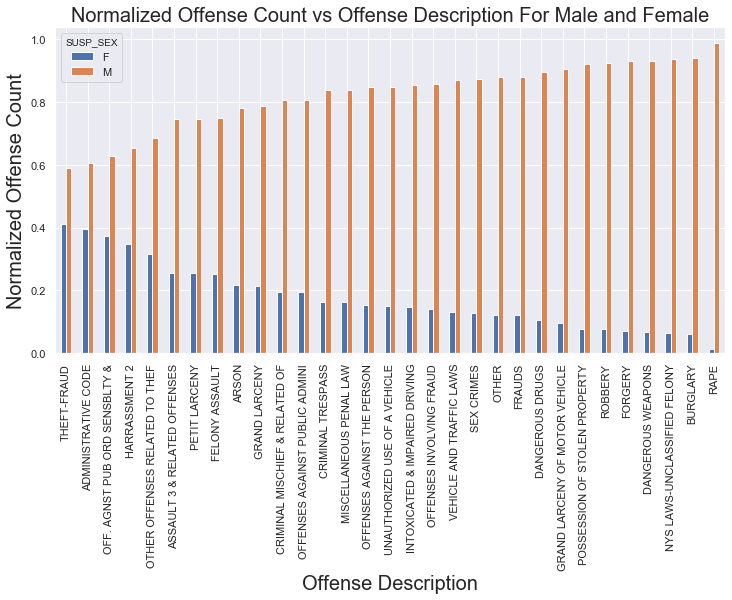

In [32]:
#Visualize offenses by gender
fig, ax = plt.subplots()
df.groupby('OFNS_DESC')['SUSP_SEX']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by=['M'])\
    .plot.bar(figsize=(12,6), ax=ax)
ax.set_title("Normalized Offense Count vs Offense Description For Male and Female", fontsize=20); ax.set_xlabel("Offense Description", fontsize=20); ax.set_ylabel('Normalized Offense Count', fontsize=20)
plt.show()

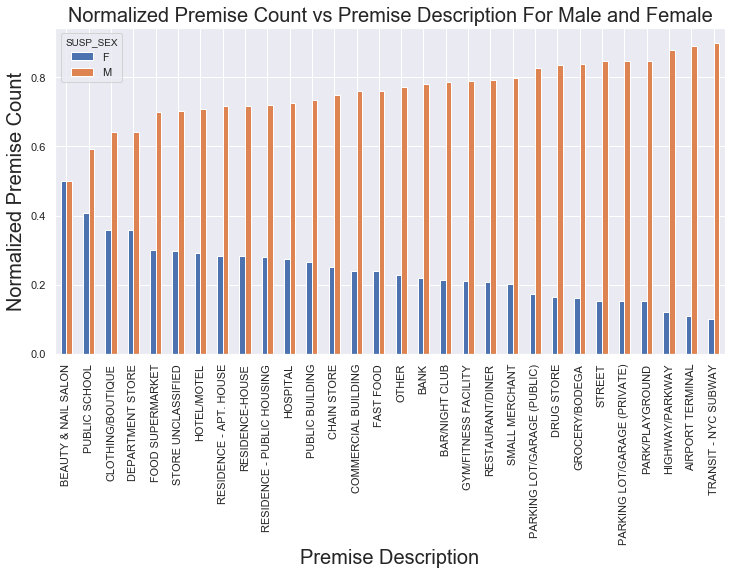

In [34]:
#Visualize premises by gender
fig, ax = plt.subplots()
df.groupby('PREM_TYP_DESC')['SUSP_SEX']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by=['M'])\
    .plot.bar(figsize=(12,6), ax=ax)
ax.set_title("Normalized Premise Count vs Premise Description For Male and Female", fontsize=20); ax.set_xlabel("Premise Description", fontsize=20); ax.set_ylabel('Normalized Premise Count', fontsize=20)
plt.show()

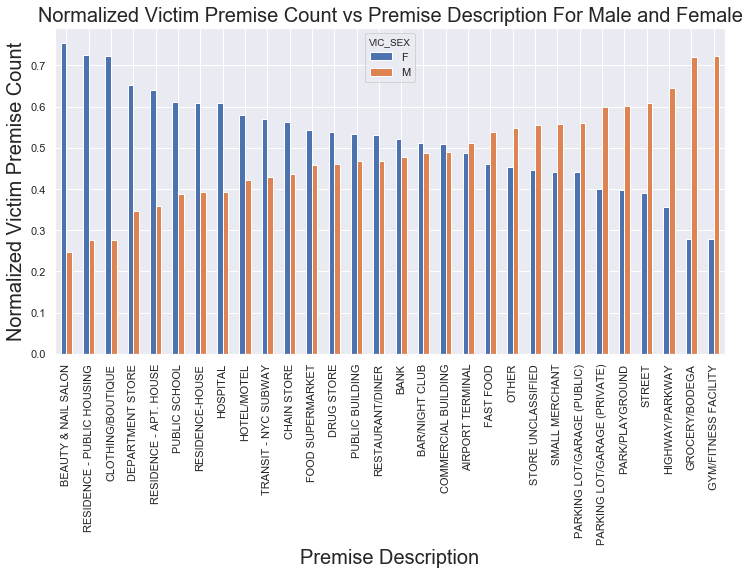

In [38]:
#Visualize victim premises by gender
fig, ax = plt.subplots()
df.groupby('PREM_TYP_DESC')['VIC_SEX']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by=['M'])\
    .plot.bar(figsize=(12,6), ax=ax)
ax.set_title("Normalized Victim Premise Count vs Premise Description For Male and Female", fontsize=20); ax.set_xlabel("Premise Description", fontsize=20); ax.set_ylabel('Normalized Victim Premise Count', fontsize=20)
plt.show()

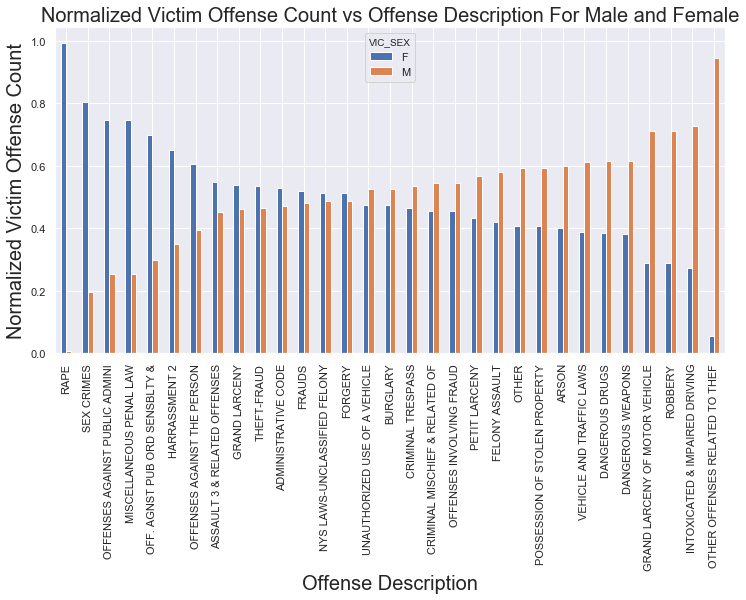

In [42]:
#Visualize victim offenses by gender
fig, ax = plt.subplots()
df.groupby('OFNS_DESC')['VIC_SEX']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by=['M'])\
    .plot.bar(figsize=(12,6), ax=ax)
ax.set_title("Normalized Victim Offense Count vs Offense Description For Male and Female", fontsize=20); ax.set_xlabel("Offense Description", fontsize=20); ax.set_ylabel('Normalized Victim Offense Count', fontsize=20)
plt.show()

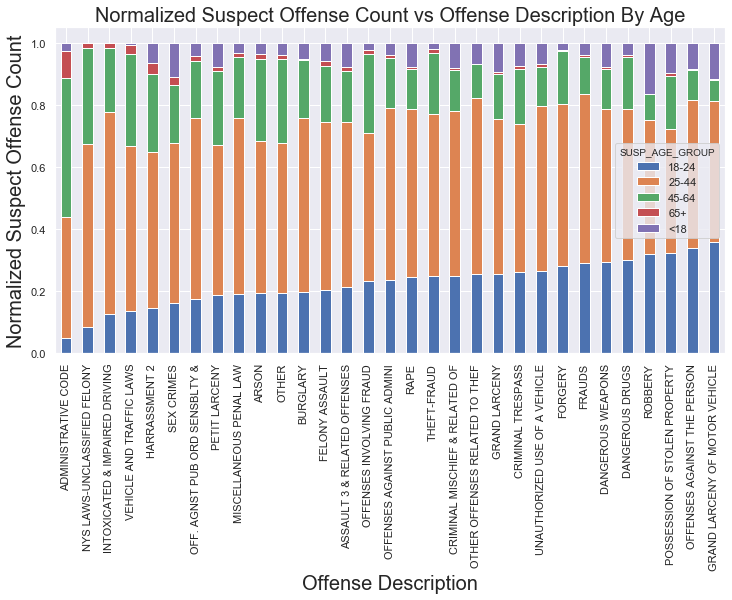

In [40]:
#Visualize suspect offense by age group
fig, ax = plt.subplots()
df.groupby('OFNS_DESC')['SUSP_AGE_GROUP']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by='18-24')\
    .plot.bar(stacked=True, figsize=(12,6), ax=ax)
ax.set_title("Normalized Suspect Offense Count vs Offense Description By Age", fontsize=20); ax.set_xlabel("Offense Description", fontsize=20); ax.set_ylabel('Normalized Suspect Offense Count', fontsize=20)
plt.show()

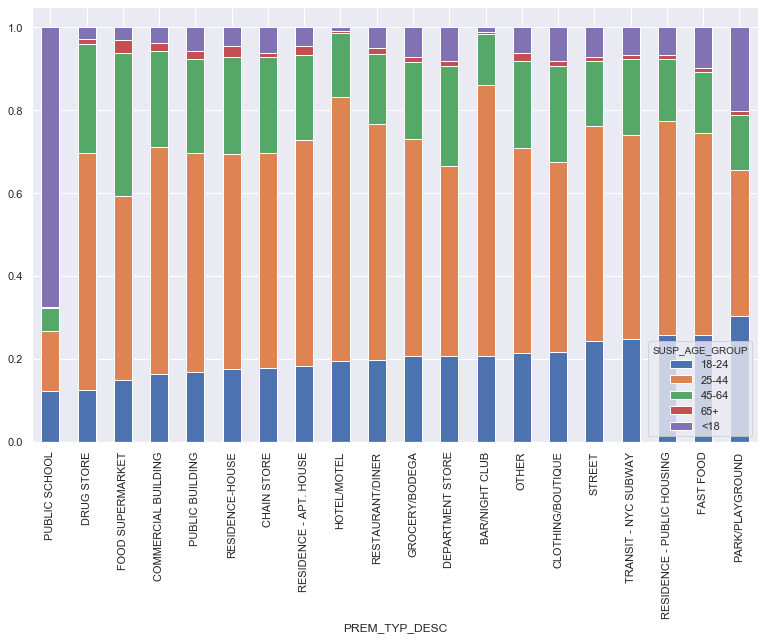

In [101]:
df.groupby('PREM_TYP_DESC')['SUSP_AGE_GROUP']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by='18-24')\
    .plot.bar(stacked=True,figsize=(13,8))
plt.show()

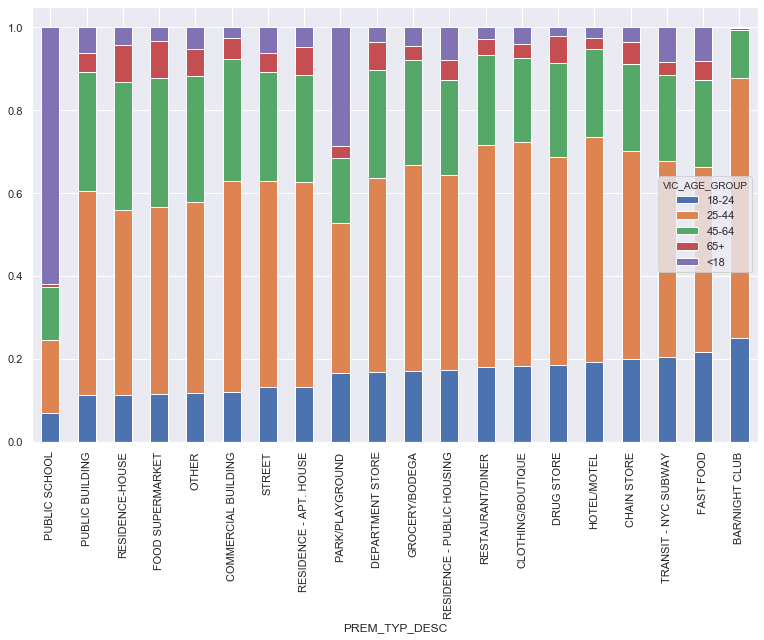

In [102]:
df.groupby('PREM_TYP_DESC')['VIC_AGE_GROUP']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by='18-24')\
    .plot.bar(stacked=True,figsize=(13,8))
plt.show()

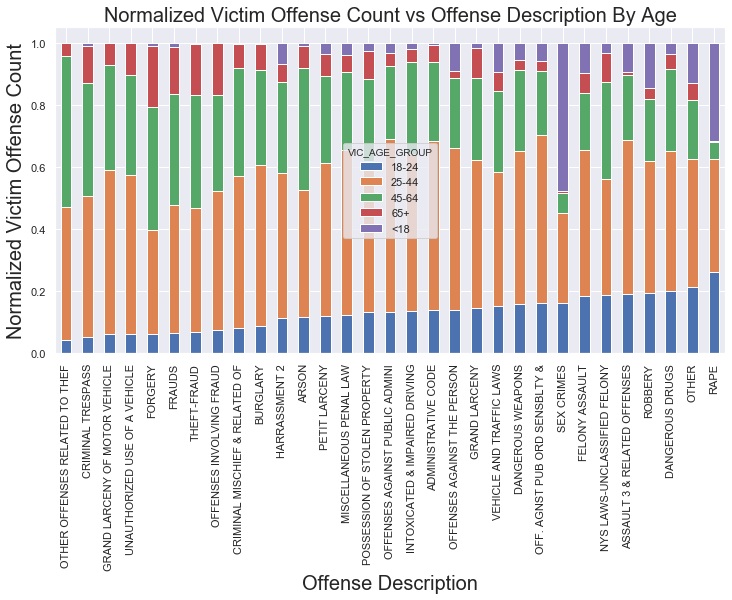

In [41]:
#Visualize victim offense by age group
fig, ax = plt.subplots()
df.groupby('OFNS_DESC')['VIC_AGE_GROUP']\
    .value_counts(normalize=True)\
    .unstack(level=1).sort_values(by='18-24')\
    .plot.bar(stacked=True, figsize=(12,6), ax=ax)
ax.set_title("Normalized Victim Offense Count vs Offense Description By Age", fontsize=20); ax.set_xlabel("Offense Description", fontsize=20); ax.set_ylabel('Normalized Victim Offense Count', fontsize=20)
plt.show()